## Customer Churn Prediction 
### Based on the Data, first It also Includes EDA 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv("netflix_customer_churn.csv")
df.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


In [ ]:
df.info()
# No null values so we can Proceed to visualization part

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   object 
 7   device                  5000 non-null   object 
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   object 
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(4), object(7)
memor

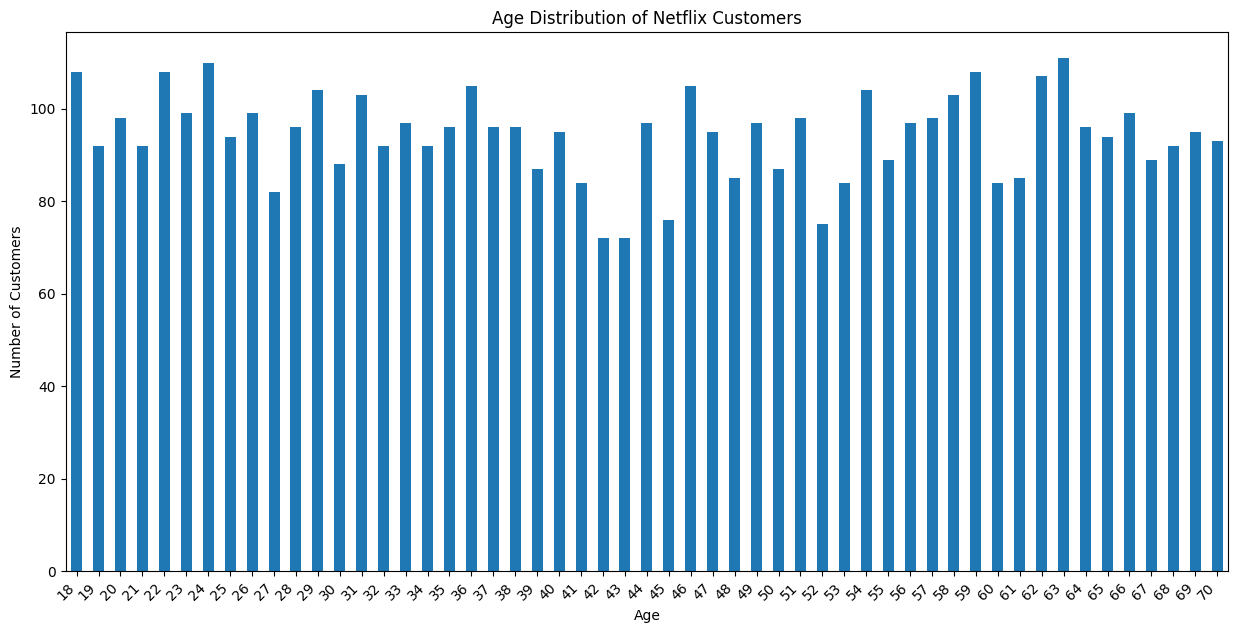

In [4]:
plt.figure(figsize=(15,7))
df["age"].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.title("Age Distribution of Netflix Customers")
plt.xticks(rotation=45, ha='right') # Rotates the x-axis labels
plt.show()

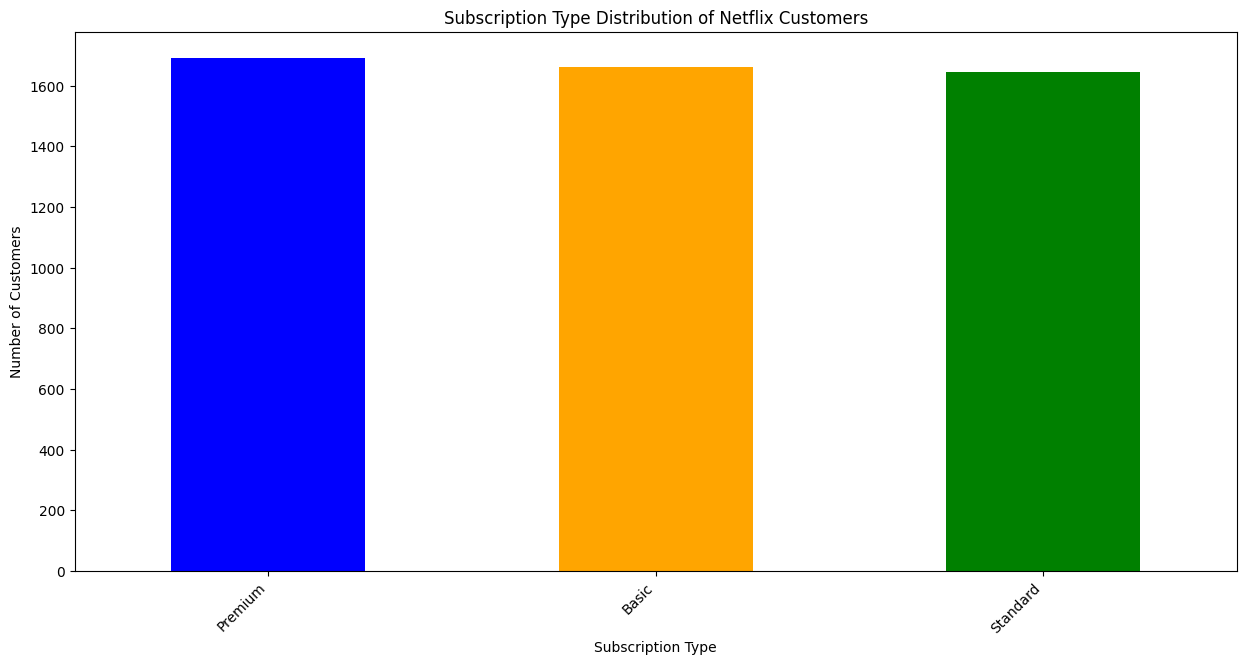

In [5]:
plt.figure(figsize=(15,7))
df["subscription_type"].value_counts().plot(kind='bar', color=['blue', 'orange', 'green'])
plt.xlabel("Subscription Type")
plt.ylabel("Number of Customers")
plt.title("Subscription Type Distribution of Netflix Customers")
plt.xticks(rotation=45, ha='right') # Rotates the x-axis labels
plt.show()

Text(0.5, 1.0, 'Favorite Genre Distribution of Netflix Customers')

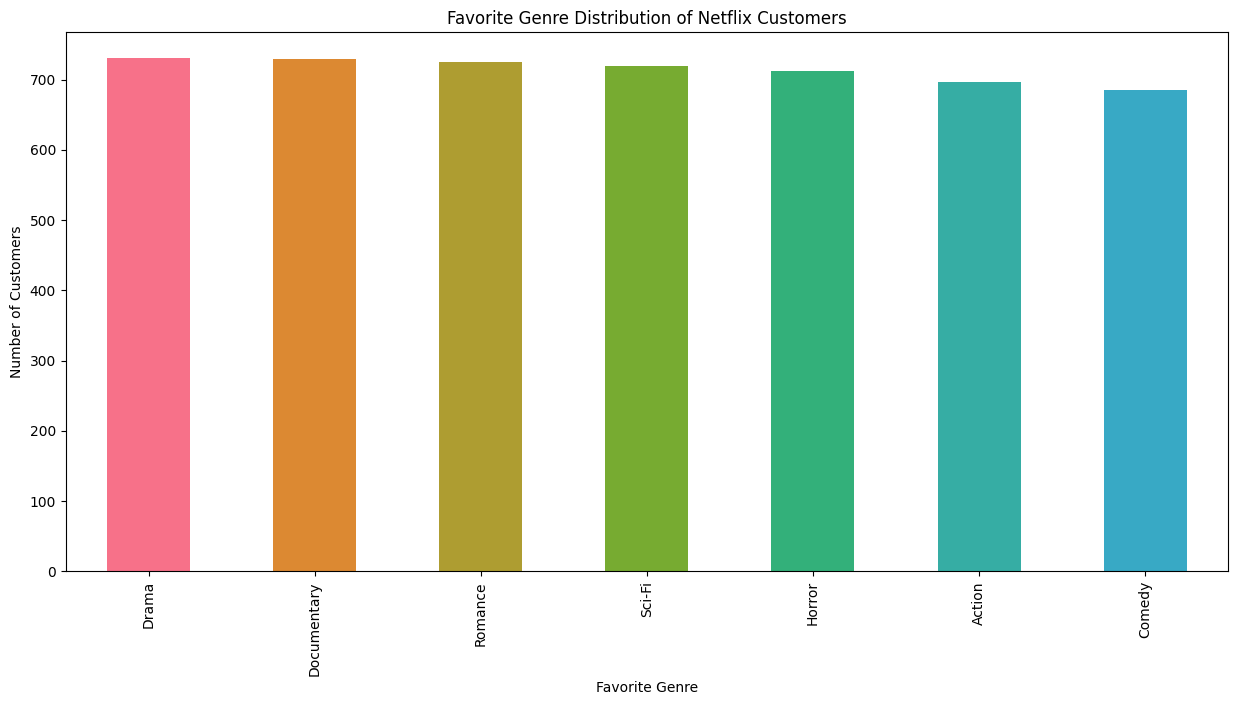

In [6]:
df["favorite_genre"].value_counts().plot(kind='bar', figsize=(15,7), color=sns.color_palette("husl", 10))
plt.xlabel("Favorite Genre")
plt.ylabel("Number of Customers")
plt.title("Favorite Genre Distribution of Netflix Customers")

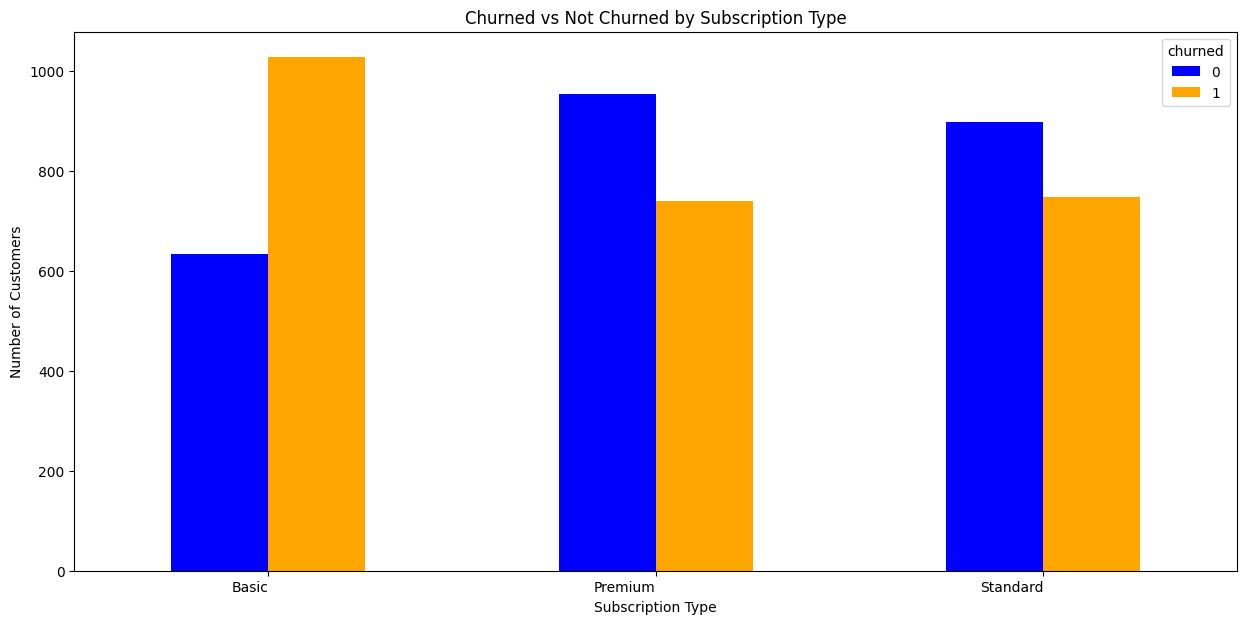

In [34]:
pd.crosstab(df["subscription_type"], df["churned"]).plot(kind='bar', figsize=(15,7), color=['blue', 'orange'])
plt.xlabel("Subscription Type")
plt.ylabel("Number of Customers")
plt.title("Churned vs Not Churned by Subscription Type")
plt.xticks(rotation=0, ha='right') # Rotates the x-axis labels
plt.show()

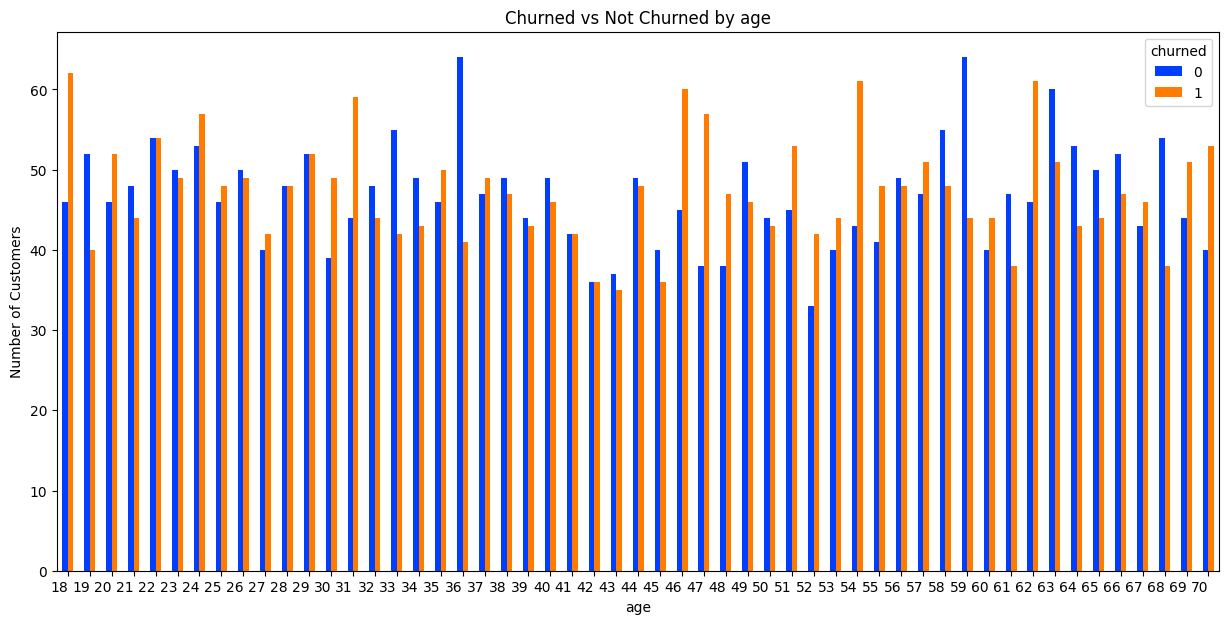

In [9]:
pd.crosstab(df["age"], df["churned"]).plot(kind='bar', figsize=(15,7), color=sns.color_palette('bright', 10))
plt.xlabel("age")
plt.ylabel("Number of Customers")
plt.title("Churned vs Not Churned by age")
plt.xticks(rotation=0, ha='right')
plt.show()

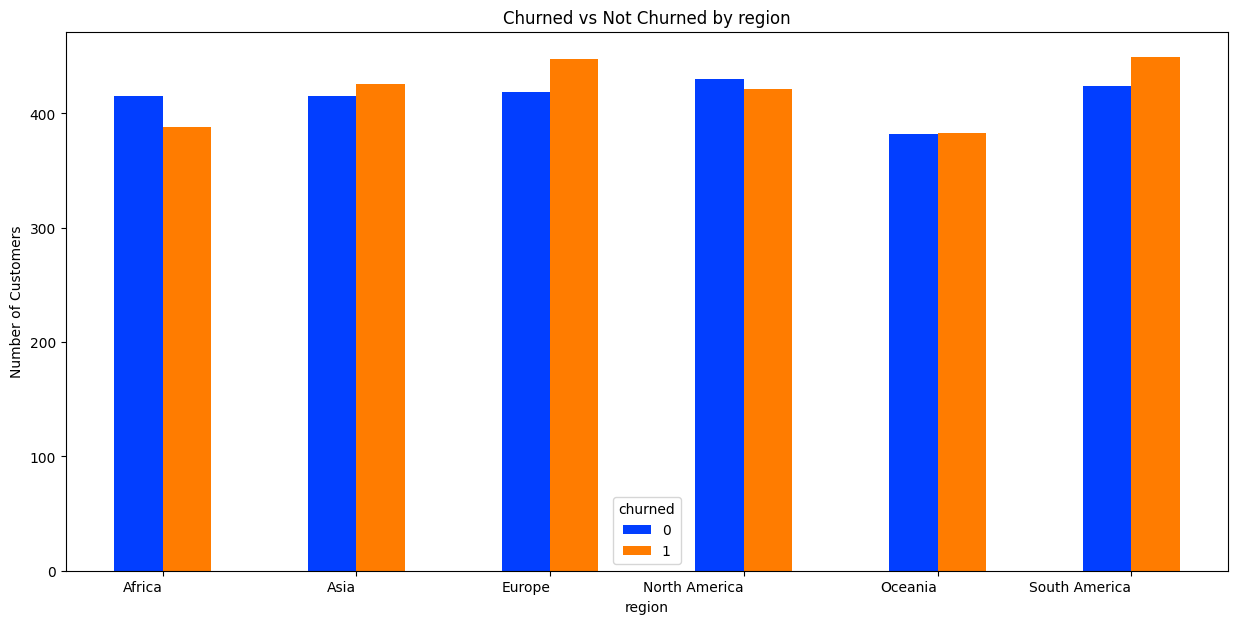

In [13]:
pd.crosstab(df["region"], df["churned"]).plot(kind='bar', figsize=(15,7), color=sns.color_palette('bright', 10))
plt.xlabel("region")
plt.ylabel("Number of Customers")
plt.title("Churned vs Not Churned by region")
plt.xticks(rotation=0, ha='right')
plt.show()

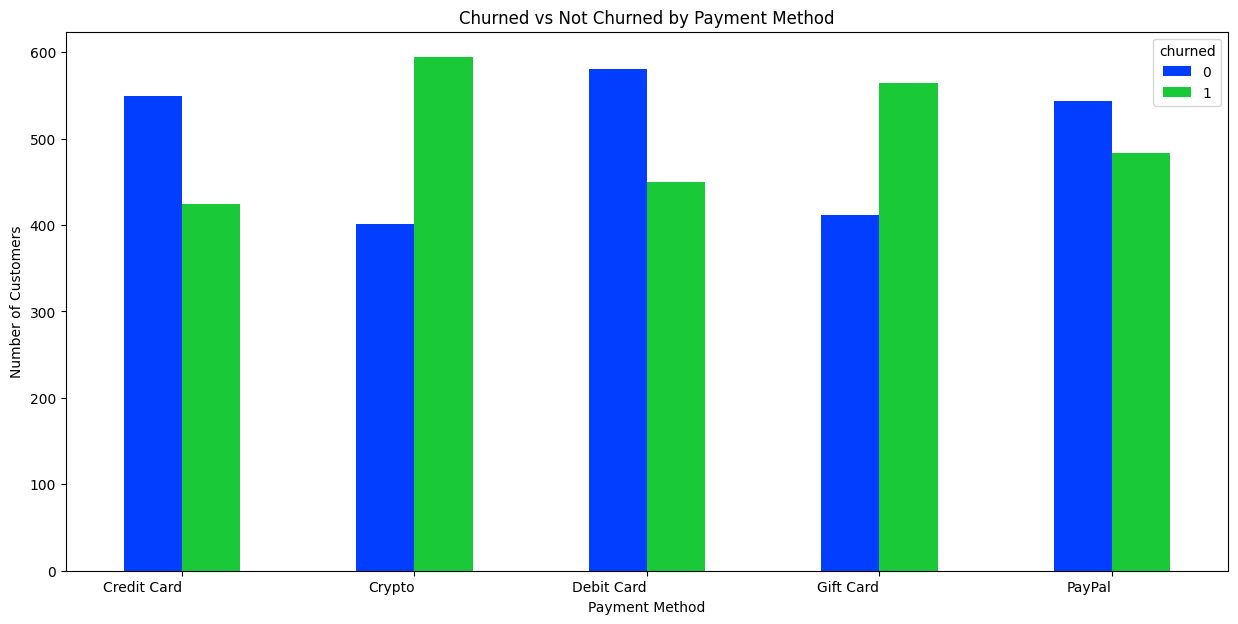

In [35]:
pd.crosstab(df["payment_method"], df["churned"]).plot(kind='bar', figsize=(15,7), color=sns.color_palette('bright6', 10))
plt.xlabel("Payment Method")
plt.ylabel("Number of Customers")
plt.title("Churned vs Not Churned by Payment Method")
plt.xticks(rotation=0, ha='right')
plt.show()

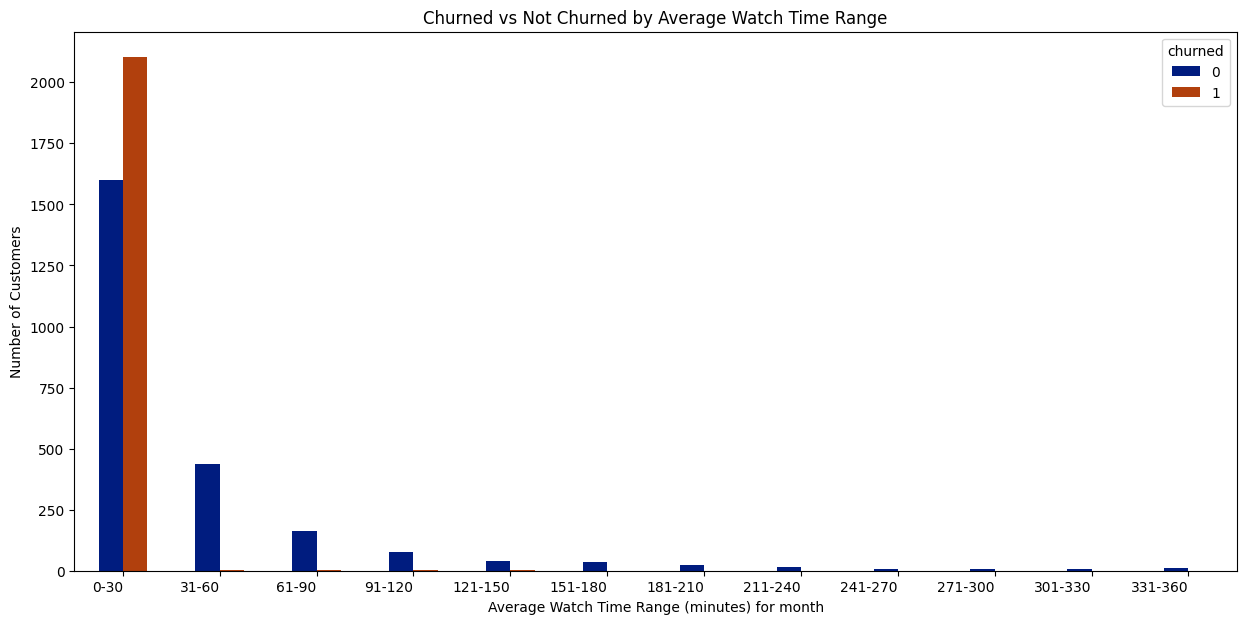

In [37]:
df["avg_time_range"] = np.floor(df["avg_watch_time_per_day"] * 30)  # Convert to Minutes per month
df["avg_time_range"] = pd.cut(df["avg_time_range"], bins=[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360], labels=["0-30", "31-60", "61-90", "91-120", "121-150", "151-180", "181-210", "211-240", "241-270", "271-300", "301-330", "331-360"])
pd.crosstab(df["avg_time_range"], df["churned"]).plot(kind='bar', figsize=(15,7), color=sns.color_palette('dark', 10))
plt.xlabel("Average Watch Time Range (minutes) for month")
plt.ylabel("Number of Customers")
plt.title("Churned vs Not Churned by Average Watch Time Range")
plt.xticks(rotation=0, ha='right')
plt.show()

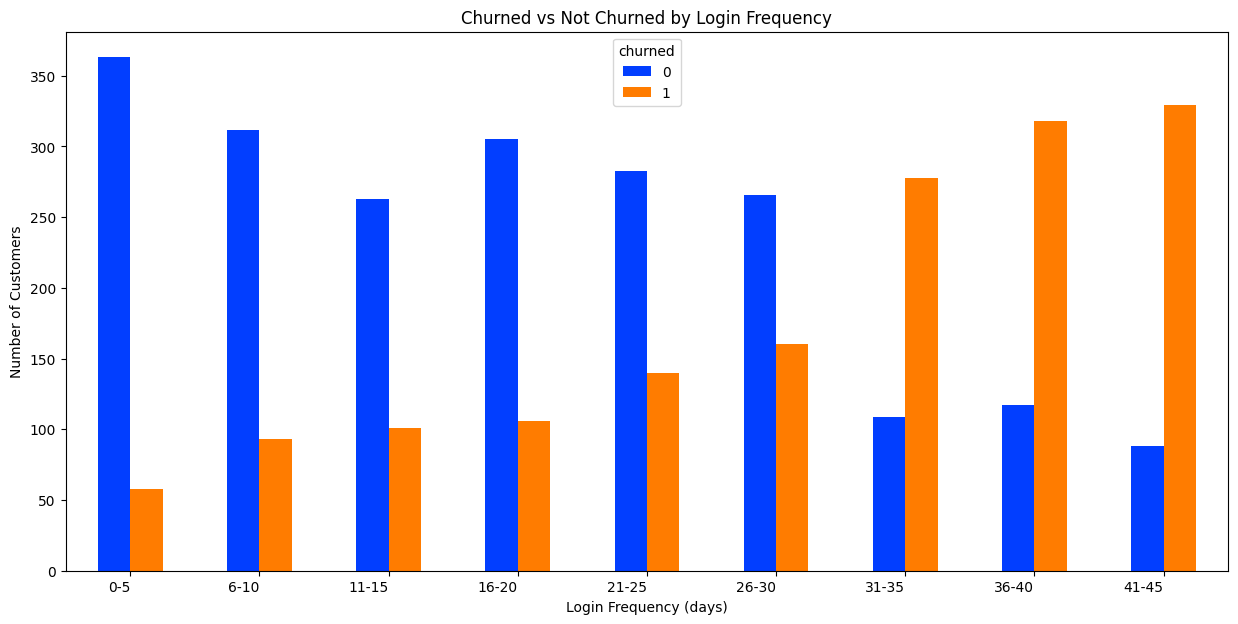

In [27]:
df["login_freq"] = pd.cut(df["last_login_days"], bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45], labels=["0-5", "6-10", "11-15", "16-20", "21-25", "26-30", "31-35", "36-40", "41-45"])
pd.crosstab(df["login_freq"], df["churned"]).plot(kind='bar', figsize=(15,7), color=sns.color_palette('bright', 10))
plt.xlabel("Login Frequency (days)")
plt.ylabel("Number of Customers")
plt.title("Churned vs Not Churned by Login Frequency")
plt.xticks(rotation=0, ha='right')
plt.show()

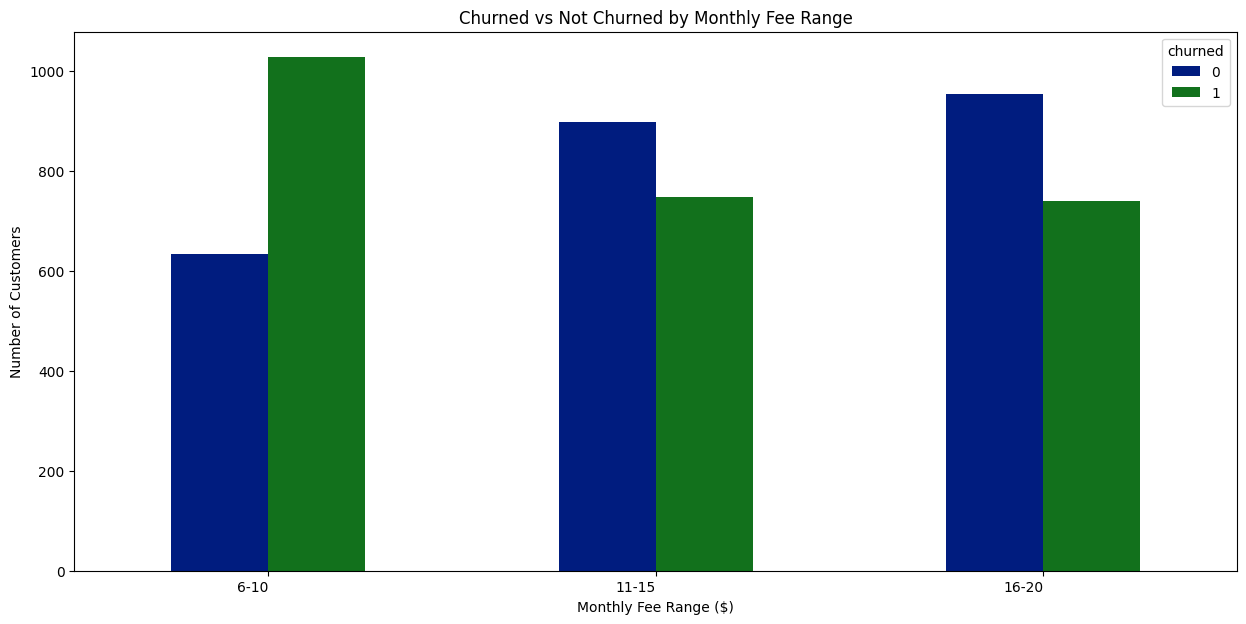

In [40]:
df["monthly_fee_range"] = pd.cut(df["monthly_fee"], bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50], labels=["0-5", "6-10", "11-15", "16-20", "21-25", "26-30", "31-35", "36-40", "41-45", "46-50"])
pd.crosstab(df["monthly_fee_range"], df["churned"]).plot(kind='bar', figsize=(15,7), color=sns.color_palette('dark6', 10))
plt.xlabel("Monthly Fee Range ($)")
plt.ylabel("Number of Customers")
plt.title("Churned vs Not Churned by Monthly Fee Range")
plt.xticks(rotation=0, ha='right')
plt.show()


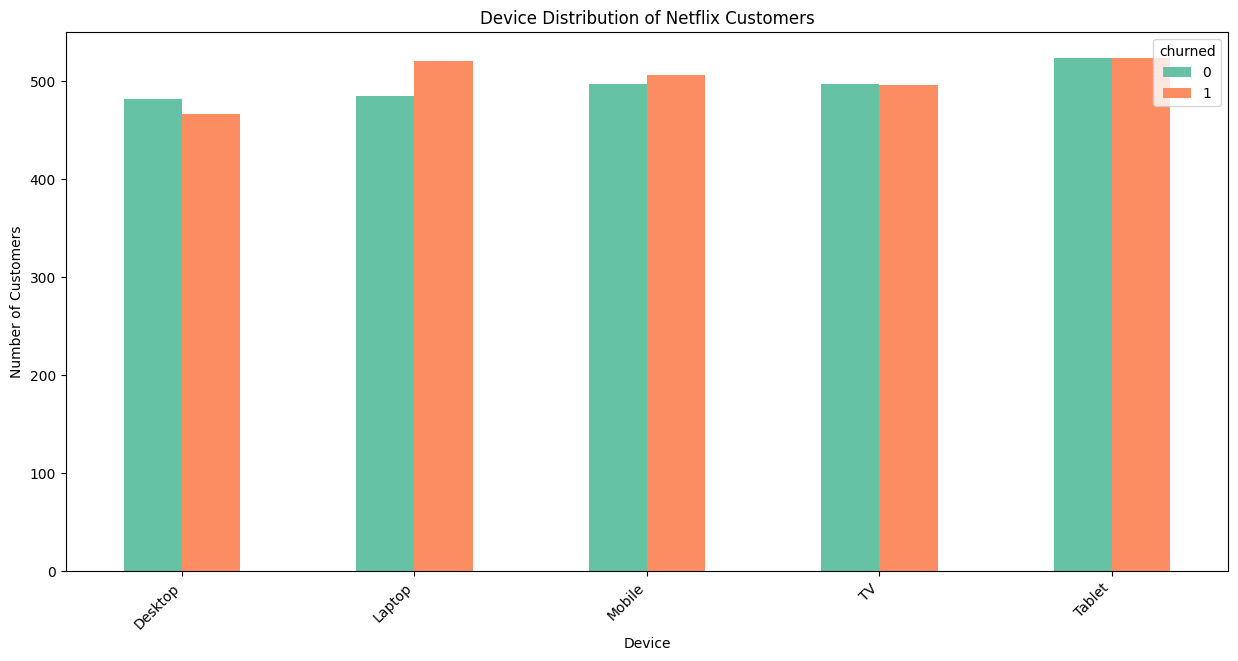

In [31]:
pd.crosstab(df["device"], df["churned"]).plot(kind='bar', figsize=(15,7), color=sns.color_palette("Set2", 10))
plt.xlabel("Device")
plt.ylabel("Number of Customers")
plt.title("Device Distribution of Netflix Customers")
plt.xticks(rotation=45, ha='right') # Rotates the x-axis labels
plt.show()

In [ ]:
# Splitting the Data for the training and testing
x = df.drop(["churned", "customer_id", "gender","avg_time_range","last_freq","monthly_fee_range"], axis=1)
y = df["churned"]

# again splitting the data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

Training data shape: (4000, 13)
Testing data shape: (1000, 13)


In [42]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Define the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Preprocessing of training data, fit model
model = RandomForestClassifier(n_estimators=100, random_state=42)
categorical_features = ["subscription_type", "region", "payment_method", "device", "favorite_genre"]
numerical_features = ["age", "monthly_fee", "last_login_days", "avg_watch_time_per_day"]
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model)])
clf.fit(x_train, y_train)
# Preprocessing of test data, get predictions
y_pred = clf.predict(x_test)
# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[443  55]
 [ 47 455]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       498
           1       0.89      0.91      0.90       502

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000



In [44]:
import joblib 
model_filename = 'customer_churn_model.pkl'
joblib.dump(clf, model_filename)

['customer_churn_model.pkl']